## Survey post-processing

## Reading in the data

In [56]:
#import modules
import pandas as pd
import geopandas as gpd
import mapclassify
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats

In [57]:
#read in the data from survey responses that had post codes
df = pd.read_csv("sports_zipcode.csv")
df.columns = ["all_sports_freq", "facilities_names", "facilities_freq", "no_facilities_freq", "neighbourhoods", "some_freq", "some_penkkiurheilu", "some_names", "sports_likely_to_some", "some_factors", "age", "gender", "city", "zip_code", "education", "income", "_", "___", "___"]

In [75]:
#code the responses that have not been coded in google sheets
df = df.replace(to_replace = {"Female": 0, "Male": 1, "Prefer not to say": np.nan, "Muu": np.nan, "I prefer not to say": np.nan,})
df = df.replace(to_replace = {"0 - 19": 10, "20 - 29": 25, "30 - 39": 35, "40 - 49": 45, "50 - 59": 55, "60 - 69": 65, "70 +": 75, "70+": 75})


In [76]:
print("Number of responses that do not include postal code information: %0.0f" % len(df[df["zip_code"].isna()]))

Number of responses that do not include postal code information: 16


In [77]:
#Check the data types of the columns
df["gender"] = df["gender"].astype(float)
df["age"] = df["age"].astype(float)
df.dtypes

all_sports_freq          float64
facilities_names          object
facilities_freq          float64
no_facilities_freq       float64
neighbourhoods            object
some_freq                float64
some_penkkiurheilu       float64
some_names                object
sports_likely_to_some     object
some_factors              object
age                      float64
gender                   float64
city                      object
zip_code                  object
education                float64
income                   float64
_                        float64
___                       object
___                      float64
xranks                   float64
yranks                   float64
dtype: object

## Spearman rank correlations for individual answers

In [78]:
df["xranks"] = pd.Series(df.income).rank()
df["yranks"] = pd.Series(df.some_freq).rank()
new_df = df.dropna(subset=["xranks", "yranks"])
print("***")
print("Spearman correlation coefficient with income and posting to social media")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

***
Spearman correlation coefficient with income and posting to social media
SpearmanrResult(correlation=0.21339304961932007, pvalue=0.0001963821020163888)


In [79]:
df["xranks"] = pd.Series(df.all_sports_freq).rank()
df["yranks"] = pd.Series(df.some_freq).rank()
new_df = df.dropna(subset=["xranks", "yranks"])
print("***")
print("Spearman correlation coefficient with sports frequency and posting to social media")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

***
Spearman correlation coefficient with sports frequency and posting to social media
SpearmanrResult(correlation=0.2102374217388914, pvalue=8.731733155133988e-05)


In [80]:
df["xranks"] = pd.Series(df.facilities_freq).rank()
df["yranks"] = pd.Series(df.some_freq).rank()
new_df = df.dropna(subset=["xranks", "yranks"])
print("***")
print("Spearman correlation coefficient with sports frequency with facilities and posting to social media")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

***
Spearman correlation coefficient with sports frequency with facilities and posting to social media
SpearmanrResult(correlation=0.1922705592941978, pvalue=0.0003487446467057166)


In [81]:
df["xranks"] = pd.Series(df.education).rank()
df["yranks"] = pd.Series(df.facilities_freq).rank()
new_df = df.dropna(subset=["xranks", "yranks"])
print("***")
print("Spearman correlation coefficient with education and sports frequency with facilities")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

***
Spearman correlation coefficient with education and sports frequency with facilities
SpearmanrResult(correlation=0.17726547841274873, pvalue=0.00101091849979375)


In [82]:
df["xranks"] = pd.Series(df.income).rank()
df["yranks"] = pd.Series(df.facilities_freq).rank()
new_df = df.dropna(subset=["xranks", "yranks"])
print("*")
print("Spearman correlation coefficient with income and sports with facilities")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

*
Spearman correlation coefficient with income and sports with facilities
SpearmanrResult(correlation=0.1333768458566069, pvalue=0.021057194461741955)


In [83]:
df["xranks"] = pd.Series(df.education).rank()
df["yranks"] = pd.Series(df.all_sports_freq).rank()
new_df = df.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient with education and all sports activities")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient with education and all sports activities
SpearmanrResult(correlation=0.05674255310608835, pvalue=0.2953970765065806)


In [84]:
df["xranks"] = pd.Series(df.education).rank()
df["yranks"] = pd.Series(df.some_freq).rank()
new_df = df.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient with education and posting to social media")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient with education and posting to social media
SpearmanrResult(correlation=0.05327088321560637, pvalue=0.3259805613343457)


In [85]:
df["xranks"] = pd.Series(df.gender).rank()
df["yranks"] = pd.Series(df.all_sports_freq).rank()
new_df = df.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient with gender and all sports")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient with gender and all sports
SpearmanrResult(correlation=0.030310178246375788, pvalue=0.5798173881567286)


In [86]:
df["xranks"] = pd.Series(df.gender).rank()
df["yranks"] = pd.Series(df.some_freq).rank()
new_df = df.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient with gender and posting to social media")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient with gender and posting to social media
SpearmanrResult(correlation=0.03709819998596908, pvalue=0.497948996119314)


In [87]:
df["xranks"] = pd.Series(df.age).rank()
df["yranks"] = pd.Series(df.some_freq).rank()
new_df = df.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient with age and posting to social media")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient with age and posting to social media
SpearmanrResult(correlation=0.07094164765614187, pvalue=0.19060638173615305)


In [88]:
df["xranks"] = pd.Series(df.age).rank()
df["yranks"] = pd.Series(df.no_facilities_freq).rank()
new_df = df.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient with age and sports without facilities")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient with age and sports without facilities
SpearmanrResult(correlation=0.05212344577736732, pvalue=0.33723672443374275)


## Spatial join

In [31]:
#retrieve the mean of the answers inside the postal code area
df = df.groupby("zip_code").mean()
df

,all_sports_freq,facilities_freq,no_facilities_freq,some_freq,some_penkkiurheilu,gender,education,income,_,___
zip_code,,,,,,,,,,
00180,4.000000,4.000000,4.000000,0.000000,NaN,0.000000,3.000000,52500.0,NaN,NaN
00200,4.352941,3.058824,4.058824,1.588235,2.533333,0.117647,2.529412,36562.5,NaN,NaN
00210,5.000000,3.400000,4.800000,1.600000,3.250000,0.200000,2.600000,27500.0,NaN,NaN
00300,6.000000,4.000000,5.000000,1.000000,1.000000,0.000000,2.000000,37500.0,NaN,NaN
00310,3.000000,2.333333,4.333333,2.000000,7.000000,0.000000,3.000000,27500.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
02630,4.571429,2.714286,4.571429,0.857143,3.750000,0.142857,2.714286,50000.0,NaN,NaN
02650,3.800000,2.200000,4.400000,1.200000,2.000000,0.200000,1.600000,37500.0,NaN,NaN
02660,3.500000,2.500000,3.500000,1.500000,1.000000,0.500000,1.500000,22500.0,NaN,NaN


In [43]:
#import a shapefile holding infomation of sports facilities and socio-economic variables by postal codes
geo = gpd.read_file("sos_econ_sport.shp")
geo["facil_pop"] = geo["NUMfacilit"] / geo["Inhabitant"].astype(float)
geo = geo[["Posno", "Nimi", "geometry", "NUMfacilit", "hi_ed", "low_in", "high_in", "facil_pop"]]
geodata = geo.merge(df, left_on= "Posno", right_on="zip_code")

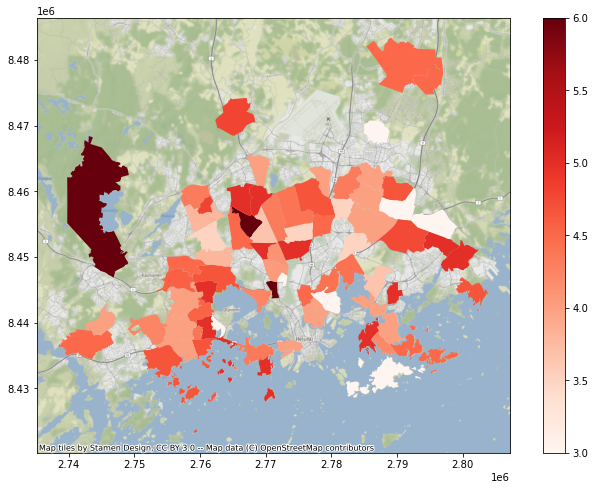

In [93]:
# map of sports frequency by postal code areas
import contextily as ctx
import matplotlib.pyplot as plt
geodata = geodata.to_crs("epsg:3857")

fig, ax = plt.subplots(figsize=(12,8))

geodata.plot(column="all_sports_freq"
             , legend= True, ax=ax, cmap='Reds')

#plt.legend(["Many times a day", "Daily", "Many times a week", "Weekly"])
ctx.add_basemap(ax=ax)


In [112]:
#save to shapefile
geodata.to_file("survey_mean2.shp")

## Spearman rank correlations with socio-economic variables by postal code area

No variable from the survey exhibit significant correlation with the socio-economic variables in postal code areas. The sample size is too small to be representative and many areas are missing altogether.

In [45]:
geodata["xranks"] = pd.Series(geodata.facilities_freq).rank()
geodata["yranks"] = pd.Series(geodata.facil_pop).rank()
new_df = geodata.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient for number of facilities / frequency of sports with facilities")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient for number of facilities / frequency of sports with facilities
SpearmanrResult(correlation=0.1661571097311379, pvalue=0.15142670862037982)


In [46]:
geodata["xranks"] = pd.Series(geodata.income).rank()
geodata["yranks"] = pd.Series(geodata.all_sports_freq).rank()
new_df = geodata.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient for number of income / frequency of sports")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient for number of income / frequency of sports
SpearmanrResult(correlation=0.1903859841509258, pvalue=0.10666256257090422)


In [47]:
geodata["xranks"] = pd.Series(geodata.income).rank()
geodata["yranks"] = pd.Series(geodata.facilities_freq).rank()
new_df = geodata.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient for number of income / frequency of sports with facilities")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient for number of income / frequency of sports with facilities
SpearmanrResult(correlation=0.18623987735374312, pvalue=0.11465601071805523)


In [48]:
geodata["xranks"] = pd.Series(geodata.income).rank()
geodata["yranks"] = pd.Series(geodata.no_facilities_freq).rank()
new_df = geodata.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient for number of income / frequency of sports without facilities")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient for number of income / frequency of sports without facilities
SpearmanrResult(correlation=-0.009827173383240203, pvalue=0.9347032507268831)


In [49]:
geodata["xranks"] = pd.Series(geodata.income).rank()
geodata["yranks"] = pd.Series(geodata.education).rank()
new_df = geodata.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient for number of income / edu")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient for number of income / edu
SpearmanrResult(correlation=0.3827369615376269, pvalue=0.0008321192877839398)


In [50]:
geodata["xranks"] = pd.Series(geodata.low_in).rank()
geodata["yranks"] = pd.Series(geodata.no_facilities_freq).rank()
new_df = geodata.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient for low income / frequency of sports without facilities")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient for low income / frequency of sports without facilities
SpearmanrResult(correlation=0.08016883573303998, pvalue=0.4941500558300861)


In [51]:
import scipy.stats

geodata["xranks"] = pd.Series(geodata.some_freq).rank()
geodata["yranks"] = pd.Series(geodata.facil_pop).rank()
new_df = geodata.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient for number of facilities / frequency of posting about sports")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient for number of facilities / frequency of posting about sports
SpearmanrResult(correlation=-0.08123162324939451, pvalue=0.48544086904898087)


In [30]:
geodata["xranks"] = pd.Series(geodata.all_sports_freq).rank()
geodata["yranks"] = pd.Series(geodata.facil_pop).rank()
new_df = geodata.dropna(subset=["xranks", "yranks"])
print("Spearman correlation coefficient for number of facilities / frequency of posting about sports")
print(scipy.stats.spearmanr(new_df.xranks, new_df.yranks))

Spearman correlation coefficient for number of facilities / frequency of posting about sports
SpearmanrResult(correlation=-0.026687509253173793, pvalue=0.632220496177927)
